In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

df_no_preprocessing = df.copy()

df_no_preprocessing["Sex"] = df_no_preprocessing["Sex"].astype("category")
df_no_preprocessing["Pclass"] = df_no_preprocessing["Pclass"].astype("category")
df_no_preprocessing["Cabin"] = df_no_preprocessing["Cabin"].astype("category")
df_no_preprocessing["Embarked"] = df_no_preprocessing["Embarked"].astype("category")

features_nop = ["Pclass", "Sex", "Age", "Fare", "SibSp",  "Parch", "Cabin", "Embarked"]
features = ["Pclass", "Sex", "Age", "Fare", "SibSp",  "Parch", "Embarked_S", "Embarked_Q"]

df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.drop(columns=["Cabin"], inplace=True)
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X_nop = df_no_preprocessing[features_nop]
y_nop = df_no_preprocessing["Survived"]

X = df[features]
y = df["Survived"]

X_train_nop, X_test_nop, y_train_nop, y_test_nop = train_test_split(X_nop, y_nop, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessed Dataset:\n", X_train.shape, X_test.shape, "\nFeature Names:\n", features, "\n\nNot Preprcessed Dataset:\n", X_train_nop.shape, X_test_nop.shape, "Feature Names:\n", features_nop)

df.head()

Preprocessed Dataset:
 (712, 8) (179, 8) 
Feature Names:
 ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_S', 'Embarked_Q'] 

Not Preprcessed Dataset:
 (712, 8) (179, 8) Feature Names:
 ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


## Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Accuracy train:", accuracy_dt_train, "Acc Test set:", accuracy_dt)

Accuracy train: 0.8342696629213483 Acc Test set: 0.7988826815642458


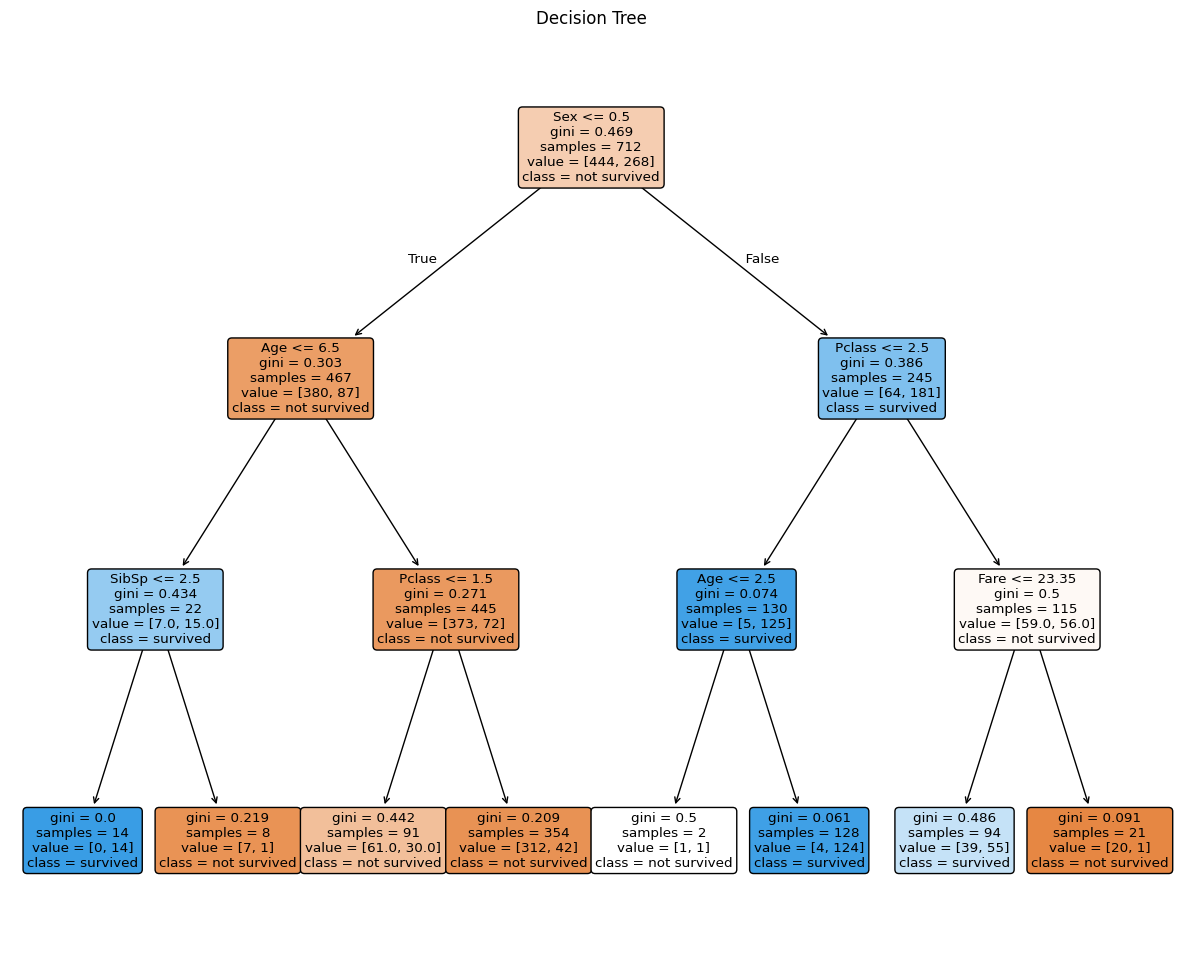

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt,
          filled=True,
          rounded=True,
          feature_names=features,
          class_names=["not survived", "survived"])
plt.title("Decision Tree")
plt.show()

## Random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Accuracy train:", accuracy_rf_train, "Acc Test set:", accuracy_rf)

Accuracy train: 0.9789325842696629 Acc Test set: 0.8044692737430168


Decision Tree Accuracy: 0.7989
Random Forest Accuracy: 0.8045


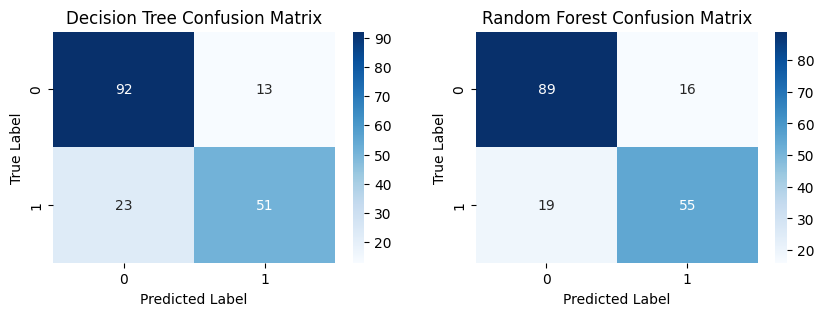

In [6]:
from sklearn.metrics import confusion_matrix

# Print accuracy results
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion matrices
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
models = ["Decision Tree", "Random Forest"]
conf_matrices = [conf_matrix_dt, conf_matrix_rf]

for ax, model, conf_matrix in zip(axes, models, conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.show()

## Key Parameters in Decision Tree & Random Forest

Understanding the most important parameters in **Decision Tree** and **Random Forest** helps in tuning them for better performance.

### 1. Important Parameters in Decision Tree
A Decision Tree builds a predictive model by splitting the dataset based on the most informative features.

#### 1.1 `max_depth` (Controls Tree Depth)
- Limits how deep the tree can grow.
- Higher depth → More complex model, risk of overfitting.
- Lower depth → Simpler model, risk of underfitting.

```python
DecisionTreeClassifier(max_depth=5)
```

#### 1.2 `criterion` (Splitting Criterion)
- Defines how the tree decides where to split.
- Options:
  - `"gini"` → Measures impurity (default).
  - `"entropy"` → Uses Information Gain.

```python
DecisionTreeClassifier(criterion="entropy")
```

#### 1.3 `min_samples_split` (Minimum Samples to Split a Node()
- Minimum number of samples required to split an internal node.
- Higher values reduce overfitting.

```python
DecisionTreeClassifier(min_samples_split=10)
```

### 2. Important Parameters in Random Forest
A Random Forest is an ensemble of multiple Decision Trees, improving accuracy and reducing overfitting.

#### 2.1 `n_estimators` (Number of Trees)
- Defines the number of trees in the Random Forest.
- More trees = More stable predictions, but increases training time.

```python
RandomForestClassifier(n_estimators=100)
```

#### 2.2 `max_depth` (Depth of Each Tree)
- Controls how deep individual trees grow.
- Helps prevent overfitting.

```python
RandomForestClassifier(max_depth=7)
```

#### 2.3 `max_features` (Feature Selection at Each Split)
- Controls how many features are considered at each split.
- Common values:
  - `"sqrt"` → Uses `sqrt(n_features)`, default for classification.
  - `"log2"` → Uses `log2(n_features)`.

```python
RandomForestClassifier(max_features="sqrt")
```

### 3. Conclusion
- Decision Trees are prone to overfitting, so `max_depth` and `min_samples_split` are critical.
- Random Forest reduces overfitting but requires `n_estimators` and `max_features` tuning.
- Adjusting these parameters improves model performance.

## Hyperparameter Fine-tuning

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [5,6,10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2,5,10],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}


## RF and DT for Regression Task

In [8]:
df_reg = pd.read_csv('../Datasets/student_performance_clean.csv')
df_reg['Extracurricular Activities'] = df_reg['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_reg = df_reg[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y_reg = df_reg['Performance Index']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("Training set size:", X_train_reg.shape)
print("Testing set size:", X_test_reg.shape)

Training set size: (7968, 5)
Testing set size: (1993, 5)


RF Regression MSE: 12.4522, R² Score: 0.9664
DT MSE: 14.8140, R² Score: 0.9600


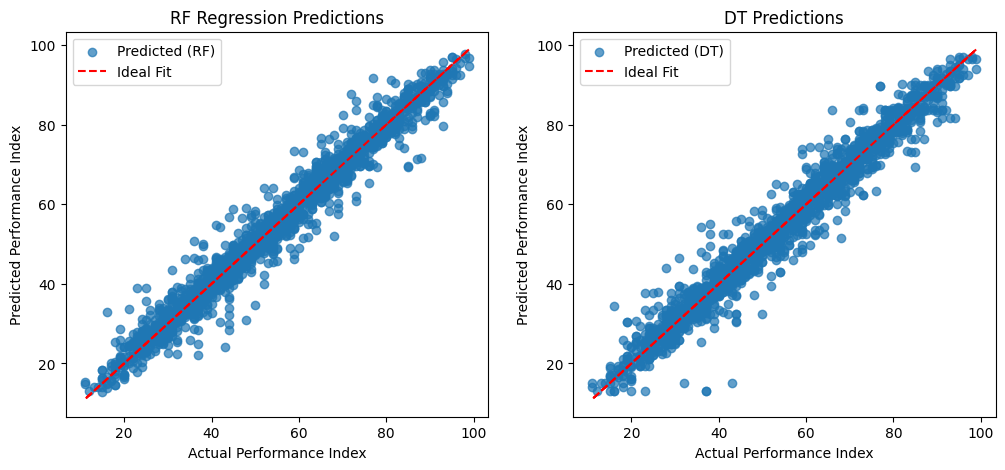

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf =rf_reg.predict(X_test_reg)

# Train Linear Regression
dt_reg = DecisionTreeRegressor(max_depth=10)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt = dt_reg.predict(X_test_reg)

# Evaluate models
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
r2_dt = r2_score(y_test_reg, y_pred_dt)

# Print results
print(f"RF Regression MSE: {mse_rf:.4f}, R² Score: {r2_rf:.4f}")
print(f"DT MSE: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_rf, alpha=0.7, label='Predicted (RF)')
plt.plot(y_test_reg, y_test_reg, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("RF Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_dt, alpha=0.7, label='Predicted (DT)')
plt.plot(y_test_reg, y_test_reg, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("DT Predictions")
plt.legend()

plt.show()

## XGBoost


## What is XGBoost?

XGBoost (Extreme Gradient Boosting) is a machine learning algorithm that belongs to the boosting family. It is an optimized version of gradient boosting designed for speed and performance. XGBoost is widely used for structured and tabular data tasks, including classification and regression. It has built-in regularization, parallelization, and efficient handling of missing values, making it superior to many traditional tree-based models.

Website for more information: [https://xgboost.ai/](https://xgboost.ai/)


## Difference Between XGBoost, Decision Tree, and Random Forest

| Feature | Decision Tree | Random Forest | XGBoost |
|---------|--------------|--------------|---------|
| Ensemble Type | Single tree | Bagging (many trees) | Boosting (sequential trees) |
| Training Process | Grows a single tree | Grows multiple trees independently | Grows trees sequentially, each correcting the previous one |
| Performance | May overfit | Reduces overfitting with averaging | Achieves higher accuracy with gradient boosting |
| Computation Speed | Fast | Moderate | Optimized for speed with parallelization |
| Handling of Missing Values | Needs imputation | Needs imputation | Handles missing values automatically |
| Interpretability | High | Medium | Low |
| Best for Small Datasets | Yes | Yes | No |
| Best for Large Datasets | No | Yes | Yes |

## How XGBoost Works Compared to Decision Tree and Random Forest

### Decision Tree
A decision tree splits data based on feature values to create a tree-like structure. It stops growing when conditions like maximum depth or pure nodes are reached.

**Steps:**
1. Select the best feature to split using criteria like Gini Impurity or Information Gain.
2. Split the dataset into child nodes.
3. Repeat until the stopping condition is met.
4. Use the resulting tree for predictions.

### Random Forest
A random forest is an ensemble of decision trees. Each tree is trained on a random subset of data, and the final prediction is made using majority voting (classification) or averaging (regression).

**Steps:**
1. Randomly select data subsets using bootstrapping.
2. Train multiple decision trees independently.
3. Aggregate predictions from all trees.

### XGBoost
XGBoost improves gradient boosting by sequentially training decision trees, where each tree learns from the mistakes of the previous one.

**Steps:**
1. Start with a weak model (a single tree).
2. Compute errors and assign higher weights to misclassified samples.
3. Train a new tree that focuses on correcting the errors.
4. Repeat the process, adding trees sequentially.
5. Combine all trees using weighted summation.

## Similarities Between XGBoost, Decision Tree, and Random Forest

- All three models are tree-based and work well with structured/tabular data.
- Decision trees are the building blocks of both random forest and XGBoost.
- All methods can be used for both classification and regression.
- Hyperparameter tuning improves performance in all three models.
- Each model has a `max_depth` parameter to control tree size and reduce overfitting.

## Conclusion

- Decision trees are simple but prone to overfitting.
- Random forests improve decision trees by averaging multiple trees.
- XGBoost improves gradient boosting by training trees sequentially to correct errors.
- Random forests are more interpretable and robust with small datasets.
- XGBoost is often the best choice for large datasets with complex patterns.

For further details, visit [https://xgboost.ai/](https://xgboost.ai/)

In [11]:
# To install xgboost uncomment the following line
# !pip install xgboost

In [13]:
from xgboost import XGBClassifier

# create model instance
bst = XGBClassifier(n_estimators=50, max_depth=3, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions

preds = bst.predict(X_test)
y_pred_bst = bst.predict(X_test)
y_pred_bst_train = bst.predict(X_train)

accuracy_bst = accuracy_score(y_test, y_pred_bst)
accuracy_bst_train = accuracy_score(y_train, y_pred_bst_train)
print("Accuracy train:", accuracy_bst_train, "Acc Test set:", accuracy_bst)

Accuracy train: 0.901685393258427 Acc Test set: 0.8324022346368715


## SHAP Values

In [ ]:
# To install shap uncomment the following line
# !pip install shap

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


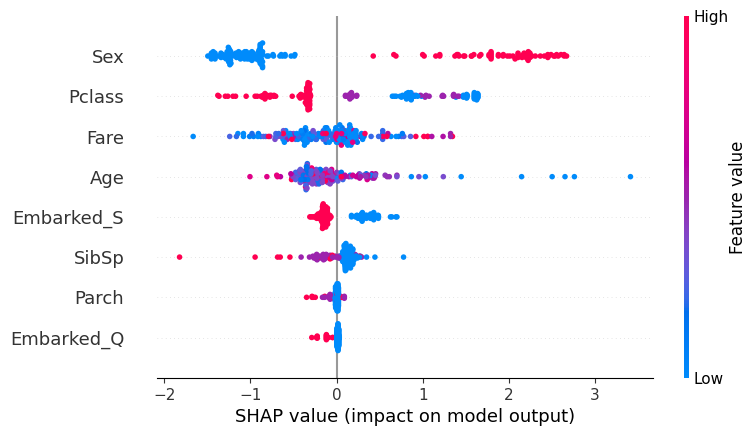

In [18]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(bst)
explanation = explainer(X_test)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

### Explanation and Interpretation of the SHAP Summary Plot for the Titanic Dataset

This **SHAP summary plot** provides a global explanation of how different features influence the predictions of a machine learning model for the Titanic dataset.

#### **1. Understanding the Plot**
- The **y-axis** lists the features in descending order of importance (from top to bottom). More important features appear at the top.
- The **x-axis** represents the SHAP value, which indicates the impact of each feature on the model’s output.
  - Negative SHAP values (left) decrease the survival probability.
  - Positive SHAP values (right) increase the survival probability.
- Each dot represents a single instance (passenger), with:
  - **Color** indicating the feature value (blue = low, red = high).
  - **Spread** showing the distribution of SHAP values for that feature.

#### **2. Feature Contributions and Impact**
- **Sex**:
  - A strong predictor of survival.
  - **Low values (blue, male)** are associated with negative SHAP values (lower survival chances).
  - **High values (red, female)** are associated with positive SHAP values (higher survival chances).

- **Pclass**:
  - Higher-class passengers (low values, red) have a positive impact on survival.
  - Lower-class passengers (high values, blue) have negative SHAP values, decreasing survival probability.

- **Fare**:
  - Higher fares (red) are associated with positive SHAP values (higher survival probability).
  - Lower fares (blue) tend to decrease survival probability.

- **Age**:
  - Younger passengers (red) have higher survival chances.
  - Older passengers (blue) tend to have negative SHAP values, reducing survival probability.

- **Embarked_S**:
  - Some impact, but not as strong as the top features.
  - Higher values (red) slightly decrease survival probability.

- **SibSp & Parch**:
  - These features show mixed influence, indicating that family relationships have a non-trivial effect on survival, however, generally lower values slightly increase survival odds.

- **Embarked_Q**:
  - Has a smaller impact compared to other features.

#### **3. Key Takeaways**
- **Sex** is the most influential feature, with males having lower survival chances and females having higher survival chances.
- **Class and fare price** strongly influence survival, with wealthier passengers having a higher likelihood of survival.
- **Age** plays a significant role, with younger passengers generally having a higher survival probability.
- **Embarkation point and family relations** also contribute but with less influence compared to sex, class, and fare.

This SHAP summary plot helps visualize feature importance and their impact on survival predictions, providing insights into how the model makes decisions.

##  Run XGBoost on dataset without preprocessing

In [19]:
bst = XGBClassifier(n_estimators=50, max_depth=3, objective='binary:logistic', enable_categorical=True)

bst.fit(X_train_nop, y_train_nop)

y_pred_bst = bst.predict(X_test_nop)
y_pred_bst_train = bst.predict(X_train_nop)

accuracy_bst = accuracy_score(y_test_nop, y_pred_bst)
accuracy_bst_train = accuracy_score(y_train_nop, y_pred_bst_train)
print("Accuracy train:", accuracy_bst_train, "Acc Test set:", accuracy_bst)

Accuracy train: 0.9073033707865169 Acc Test set: 0.8156424581005587


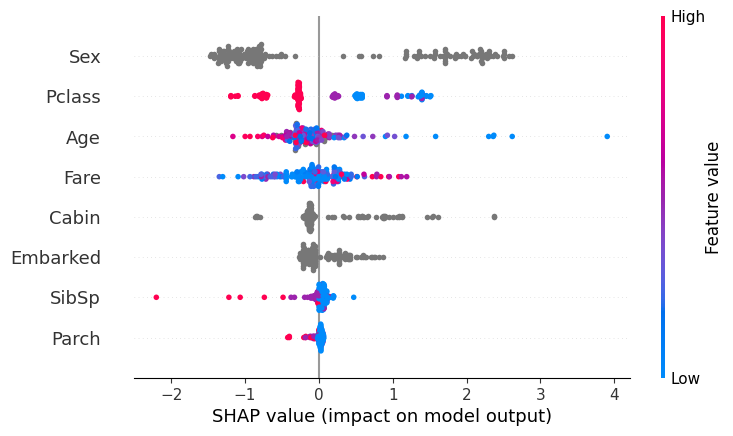

In [25]:
explainer = shap.TreeExplainer(bst)
explanation = explainer(X_test_nop)

shap_values = explanation.values

shap.plots.beeswarm(explanation)

In [29]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer(X_test_nop)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0, ...])

### Interpretation of the SHAP Value Plot

The given **SHAP (SHapley Additive exPlanations) value plot** visually explains the contribution of different features to a model’s prediction for a specific instance (i.e., a particular passenger) in the Titanic dataset.

#### **1. Understanding the SHAP Plot Structure**
- The **horizontal axis** represents the model’s prediction score. The **base value** (-0.5369) is the model's average prediction before considering any specific feature.
- The **final model output (f(x))** for this instance is **-1.93**, which is influenced by different features.
- Features that **increase** the prediction (favoring survival) are shown in **red**, while those that **decrease** the prediction (reducing the chance of survival) are in **blue**.

#### **2. Feature Contributions and Their Impact**
- **Negative contributions (reducing survival likelihood, in blue)**:
  - `Sex = male`: Being male significantly decreases survival probability.
  - `Age = NaN`: Missing age also contributes to reducing survival probability.
  - `Pclass = 3`: Being in third-class lowers survival chances.
  - `Cabin = NaN`: Missing cabin information negatively impacts survival.
  - `Fare = 15.25`: A relatively low fare suggests a lower-class ticket, decreasing survival odds.
  - `Parch = 1`: Having a parent/child aboard slightly decreases survival in this case.

- **Positive contributions (increasing survival likelihood, in red)**:
  - `SibSp = 1`: Having a sibling/spouse aboard slightly increases survival chances.
  - `Embarked = C`: Embarking from Cherbourg contributes positively to survival probability (possibly linked to a wealthier passenger demographic).

#### **3. Final Prediction Interpretation**
- The final predicted value **f(x) = -1.93** suggests that this passenger likely **did not survive**.
- This result is primarily due to being **male**, in **third-class**, and having a **low fare**, all of which significantly lowered survival probability.
- The small positive contributions from **SibSp** and **Embarked** were not enough to offset the dominant negative contributions.

### **Conclusion**
This SHAP explanation effectively shows how different features influenced the model’s prediction for this specific Titanic passenger. The most crucial negative factor was **being male and in third class**, while **embarking from Cherbourg and having a sibling/spouse** slightly increased survival odds. Ultimately, the negative factors dominated, leading to a prediction of **non-survival**.

# Explanation with Examples


## 1. Toy Dataset (Binary Classification)

To explain these concepts, consider a toy dataset where the goal is to predict whether a person will buy a sports car based on age and income level.

| Person | Age | Income | Buys Sports Car? (Target) |
|--------|-----|--------|--------------------------|
| A      | 25  | High   | Yes                      |
| B      | 45  | Low    | No                       |
| C      | 35  | Medium | Yes                      |
| D      | 50  | High   | No                       |
| E      | 23  | Medium | Yes                      |
| F      | 40  | Low    | No                       |

## 2. Building a Decision Tree Step by Step

### Step 1: Choosing the Best Feature for Splitting

The best feature for splitting is selected using criteria like Gini Impurity or Entropy.

For each feature (Age or Income), the impurity reduction is calculated, and the feature with the highest reduction is selected. If splitting by Income:

- "High" → [Yes, No]
- "Medium" → [Yes, Yes]
- "Low" → [No, No]

This results in lower impurity, so Income is chosen as the first split.

### Step 2: Creating the First Split

```
       [Root] Income?
        /     |     \
      High   Medium  Low
     /    \   /   \  /   \
   Yes    No Yes  Yes  No  No
```

People with Medium Income mostly buy sports cars. People with Low Income do not buy sports cars. People with High Income are mixed, so another split is needed.

### Step 3: Adding Depth Using Age

Since the High-Income group is still impure, another split is done using Age.

- If Age < 30, they are more likely to buy a car.
- If Age > 30, they are less likely.

```
       [Root] Income?
        /     |     \
      High   Medium  Low
     /    \   /   \  /   \
   Age<30 Age>30 Yes  Yes  No  No
   /   \
 Yes    No
```

Now, the tree has pure leaf nodes, so it stops growing.

## 3. Decision Tree Parameters

- `criterion="gini"` or `"entropy"` defines how to measure impurity.
- `max_depth=2` limits how deep the tree grows to prevent overfitting.
- `min_samples_split=2` ensures that a node has at least two samples before splitting.

Example in Python:

```python
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_split=2)
dt.fit(X_train, y_train)
```

## 4. How Random Forest Works Using Bagging

A Random Forest builds multiple decision trees using bootstrapped samples and feature selection.

### Step 1: Bootstrapping (Creating Random Subsets)

Instead of using all data, multiple random subsets are created with replacement.

#### Bootstrapped Sample 1

| Person | Age | Income | Buys Sports Car? |
|--------|-----|--------|------------------|
| A      | 25  | High   | Yes              |
| C      | 35  | Medium | Yes              |
| E      | 23  | Medium | Yes              |
| F      | 40  | Low    | No               |

#### Bootstrapped Sample 2

| Person | Age | Income | Buys Sports Car? |
|--------|-----|--------|------------------|
| B      | 45  | Low    | No               |
| D      | 50  | High   | No               |
| A      | 25  | High   | Yes              |
| C      | 35  | Medium | Yes              |

Each sample is used to train a different decision tree.

### Step 2: Feature Selection at Each Split

Unlike a normal decision tree, Random Forest randomly selects a subset of features at each split. If there are two features (Age, Income), the model may randomly choose only one at each split. This prevents trees from being too similar.

### Step 3: Aggregating Predictions Using Majority Voting

Each decision tree gives a prediction, and the final prediction is based on majority vote.

| Tree 1 Prediction | Tree 2 Prediction | Tree 3 Prediction | Final Decision |
|------------------|------------------|------------------|---------------|
| Yes            | No               | Yes             | Yes (Majority) |

Random Forest is more stable and less prone to overfitting than a single decision tree.

## 5. Random Forest Parameters

- `n_estimators=100` sets the number of trees in the forest.
- `max_depth=3` limits depth to prevent overfitting.
- `max_features="sqrt"` selects a random subset of features at each split.
- `bootstrap=True` enables bagging by sampling data with replacement.

Example in Python:

```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features="sqrt", bootstrap=True)
rf.fit(X_train, y_train)
```

## 6. Summary

| Concept | Decision Tree | Random Forest |
|---------|--------------|--------------|
| Tree Type | Single Tree | Multiple Trees |
| Ensemble Type | None | Bagging |
| Overfitting Risk | High | Lower |
| Feature Selection | Uses all features | Random subset of features |
| Bootstrapping | No | Yes |
| Final Prediction | Single tree decision | Majority voting |

Decision trees are simple but prone to overfitting. Random Forest improves accuracy and stability by averaging multiple decision trees. Bagging ensures that trees get different training data, reducing variance.

This is how a Decision Tree and Random Forest work step by step.